In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
atoms = ['Ar', 'H', 'Si', 'N', 'Cl', 'O']
dfs = []
for elem in atoms:
    dfs.append(pd.read_excel(f'emission_spectrum/{elem}.xlsx')[['intensity','wavelength']].dropna().reset_index(drop=True))
dfs[0].head()

,intensity,wavelength
0,180,866.79997
1,150,869.75411
2,180,876.05767
3,180,879.94656
4,150,894.31013


In [3]:
# in order to remove p label,
for df in dfs:
    temp = []
    df['wavelength'] = df['wavelength'].astype(float)
    df['wavelength'] = df['wavelength'].apply(lambda x:x/10)
    df['wavelength'] = df['wavelength'].apply(lambda x: round(x,3))
    df['intensity'] = df['intensity'].apply(lambda x: str(x))
    for elem in df['intensity']:
        temp.append(elem.split('\xa0'))
    for i in range(len(temp)):
        while '' in temp[i]:
            temp[i].remove('')
        while 'P' in temp[i]:
            temp[i].remove('P')
        while 'P,d' in temp[i]:
            temp[i].remove('P,d')            
    df['intensity'] = np.array(temp).flatten().tolist()
    df['intensity'] = df['intensity'].astype(float)

In [10]:
dfs[0] = dfs[0].sort_values(by='wavelength').reset_index(drop=True)
Ar = dfs[0]['wavelength'].values
Ar = np.array(Ar).reshape(-1,1)

from tabulate import tabulate
# create header
head = ['Ar', 'Wavelength']

# display table
print(tabulate(Ar, headers=head, tablefmt="grid",showindex="always")) # showindex="always"

+------+--------------+
|   Ar |   Wavelength |
+======+==============+
|    0 |       66.187 |
+------+--------------+
|    1 |       67.095 |
+------+--------------+
|    2 |       67.185 |
+------+--------------+
|    3 |       72.336 |
+------+--------------+
|    4 |       86.68  |
+------+--------------+
|    5 |       86.975 |
+------+--------------+
|    6 |       87.606 |
+------+--------------+
|    7 |       87.995 |
+------+--------------+
|    8 |       89.431 |
+------+--------------+
|    9 |       91.978 |
+------+--------------+
|   10 |       93.205 |
+------+--------------+
|   11 |      104.822 |
+------+--------------+
|   12 |      106.666 |
+------+--------------+
|   13 |      427.753 |
+------+--------------+
|   14 |      434.806 |
+------+--------------+
|   15 |      460.957 |
+------+--------------+
|   16 |      472.687 |
+------+--------------+
|   17 |      476.486 |
+------+--------------+
|   18 |      480.602 |
+------+--------------+
|   19 |      48

In [11]:
dfs[-1] = dfs[-1].sort_values(by='wavelength').reset_index(drop=True)
O = dfs[-1]['wavelength'].values
O = np.array(O).reshape(-1,1)

from tabulate import tabulate
# create header
head = ['O', 'Wavelength']

# display table
print(tabulate(O, headers=head, tablefmt="grid",showindex="always")) # showindex="always"

+-----+--------------+
|   O |   Wavelength |
+=====+==============+
|   0 |       42.992 |
+-----+--------------+
|   1 |       43.004 |
+-----+--------------+
|   2 |       43.018 |
+-----+--------------+
|   3 |       53.783 |
+-----+--------------+
|   4 |       53.826 |
+-----+--------------+
|   5 |       53.832 |
+-----+--------------+
|   6 |       53.909 |
+-----+--------------+
|   7 |       53.955 |
+-----+--------------+
|   8 |       53.985 |
+-----+--------------+
|   9 |       71.85  |
+-----+--------------+
|  10 |       71.857 |
+-----+--------------+
|  11 |       83.276 |
+-----+--------------+
|  12 |       83.333 |
+-----+--------------+
|  13 |       83.447 |
+-----+--------------+
|  14 |      130.217 |
+-----+--------------+
|  15 |      130.486 |
+-----+--------------+
|  16 |      130.603 |
+-----+--------------+
|  17 |      313.472 |
+-----+--------------+
|  18 |      391.196 |
+-----+--------------+
|  19 |      397.326 |
+-----+--------------+
|  20 |    

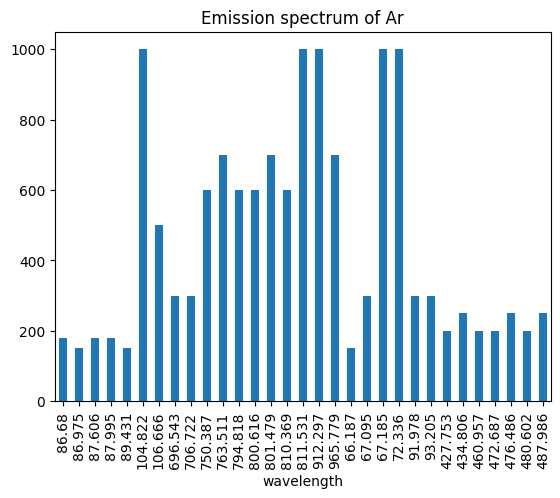

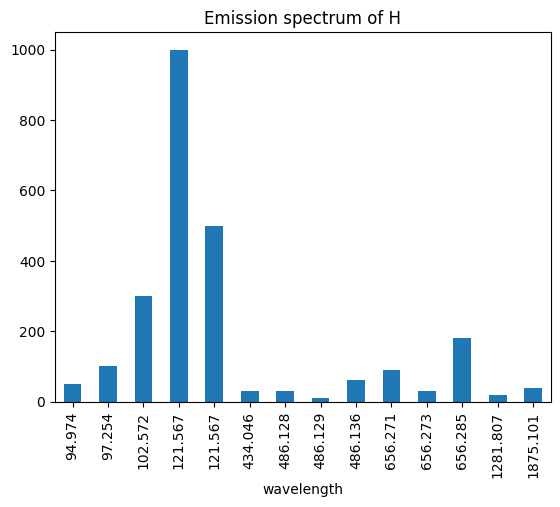

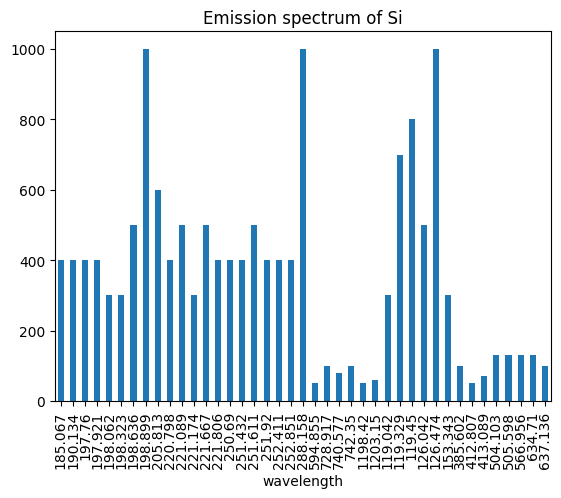

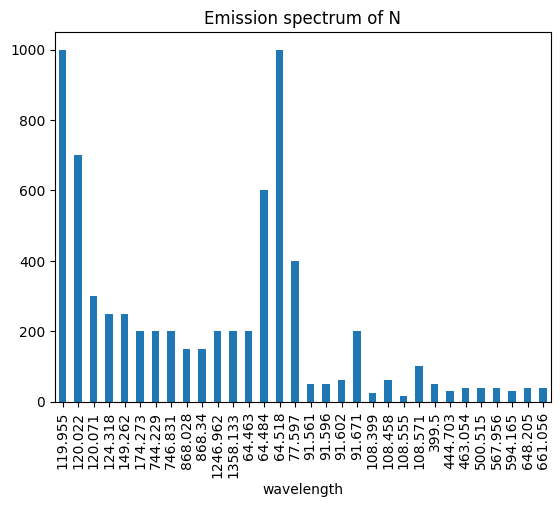

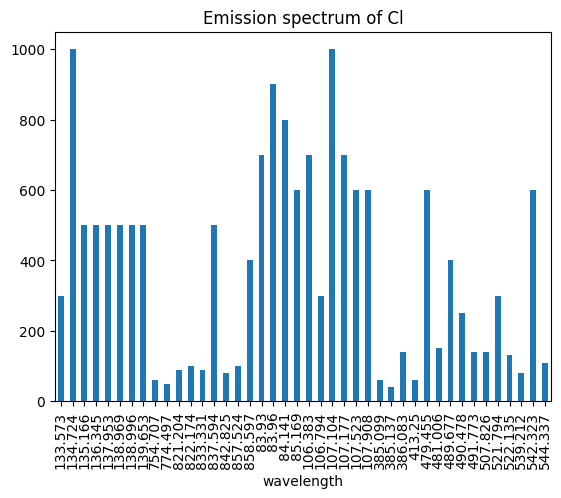

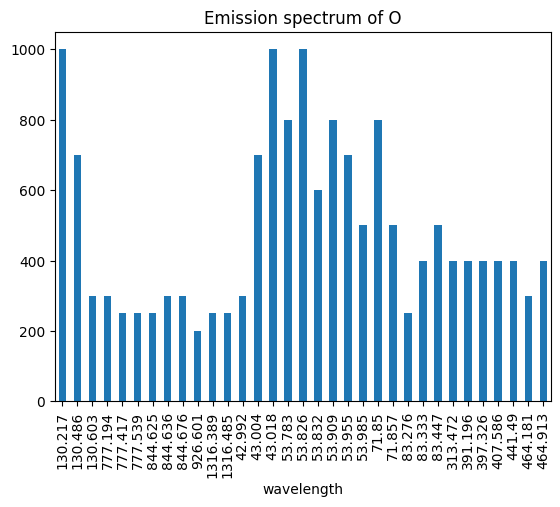

In [68]:
for idx, df in enumerate(dfs):
    df.plot.bar(x='wavelength', y='intensity', title=f'Emission spectrum of {atoms[idx]}', legend=False)
    # plt.xticks([])
    plt.show()

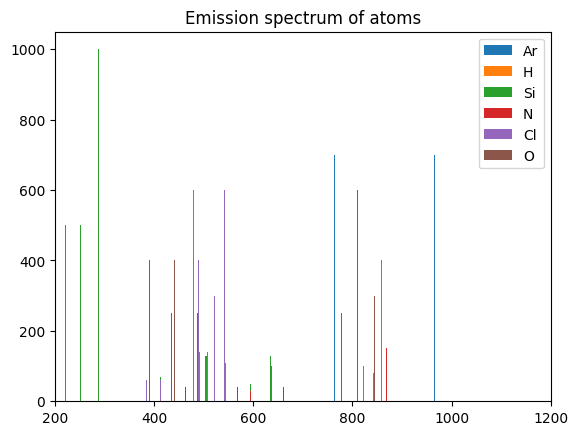

In [71]:
for idx, df in enumerate(dfs):
    plt.bar(df['wavelength'].values, df['intensity'].values)
    plt.title(f'Emission spectrum of atoms')
    plt.xlim(200,1200)
    plt.legend(atoms)

In [75]:
# save as csv
spec = pd.DataFrame()
for idx, val in enumerate(atoms):
    spec[val] = dfs[idx]['wavelength']
spec = spec.fillna(0)
spec.to_csv('spectrum of atoms.csv', index=False)